# Circle Winding bias calculation for country
## Data from: https://github.com/googlecreativelab/quickdraw-dataset (Google QuickDraw!)
### Get the circle.ndjson file from: https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/raw, and save it in the same path as this notebook
## Based on: https://qz.com/994486
## Winding calculation: http://blog.element84.com/polygon-winding.html

#### Point of caution: the coordinates in the data are in pixel coordinates (left handed coordinate system with (0,0) on top left)

In [12]:
import numpy as np
import jsonlines
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
count = 0
count_cl = 0 # Clockwise winding count
count_ccl = 0 # Clockwise winding count
with jsonlines.open('circle.ndjson') as reader:
    for obj in reader:
        if obj['countrycode'] == 'IN': # Insert country code - https://www.wikiwand.com/en/ISO_3166-1_alpha-2
            count = count + 1
            abc = obj['drawing'][0]
            sum = 0
            for i in range(np.shape(abc)[1]-1):
                sum = sum - (abc[0][i+1]-abc[0][i])*(abc[1][i+1]+abc[1][i]) # negative sign because of change in handedness
            if sum > 0:
                count_cl = count_cl + 1
            elif sum < 0:
                count_ccl = count_ccl + 1
            #if count == 6: # If you want to visualise a particular drawing
            #    break
print count, count_cl, count_ccl

943 121 816


213.203994751 138.74899292
-22799.1674846


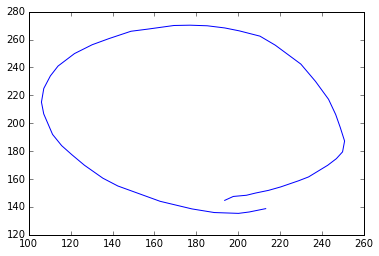

In [15]:
print abc[0][0], abc[1][0]
print sum
plot(abc[0][0:50],abc[1][0:50]) # in equivalent right handed coordinate system: so reverse winding

In [16]:
(1 - (count_cl+count_ccl)*1./count*1.)*100

0.6362672322375418

In [17]:
count_cl*100./count

12.831389183457052

In [18]:
count_ccl*100./count

86.53234358430541

In [19]:
count

943